In [1]:
import delay_predictor
import data_processing
import pandas as pd
import numpy as np
import scipy
import random
import pickle

In [2]:
delay_df = pd.read_pickle("../resources/generated/pickles/combined_flight_data")

In [10]:
delay_df.head()

,index,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,...,wdir_cardinal,gust,wspd,pressure,precip_hrly,wx_phrase,location_id,record_start_date,record_end_date,airport_code
0,5693,2022,2,5,26,4,2022-05-26,AA,AA_CODESHARE,19805,...,S,0.0,5.0,29.45,0.0,Light Rain,SEA,2022-05-26 15:53:00,2022-05-26 17:53:00,SEA
1,5697,2022,2,5,26,4,2022-05-26,AA,AA_CODESHARE,19805,...,CALM,0.0,0.0,29.46,0.0,Mostly Cloudy,SEA,2022-05-26 11:53:00,2022-05-26 13:53:00,SEA
2,5733,2022,2,5,27,5,2022-05-27,AA,AA_CODESHARE,19805,...,S,0.0,7.0,29.92,0.02,Light Rain,PDX,2022-05-27 12:53:00,2022-05-27 14:53:00,PDX
3,5781,2022,2,5,27,5,2022-05-27,AA,AA_CODESHARE,19805,...,SSW,0.0,8.0,29.84,0.0,Cloudy,PDX,2022-05-27 07:53:00,2022-05-27 09:53:00,PDX
4,5785,2022,2,5,27,5,2022-05-27,AA,AA_CODESHARE,19805,...,SSW,0.0,10.0,29.48,0.0,Mostly Cloudy,SEA,2022-05-27 15:53:00,2022-05-27 17:53:00,SEA


In [11]:
RELEVANT_COLS = ['Year', 'Month', 'DayofMonth',
                 'Origin', 'temp', 'dewPt', 'day_ind',
                 'rh', 'wdir_cardinal', 'gust', 'wspd', 'pressure', 'wx_phrase']

In [12]:
delay_df = delay_df[RELEVANT_COLS]

In [19]:
out = delay_predictor.pre_process_dataset(df_to_process=pd.read_pickle("../resources/generated/pickles/combined_flight_data"),
                                          relevant_columns=RELEVANT_COLS,
                                          target_col="ArrDel15",
                                          encoder_path = "../resources/testing_resources/encoder.pkl")

C:\Users\bruno\miniconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [2, 4, 6, 8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [25]:
type(out[0])

scipy.sparse._csr.csr_matrix

In [28]:
isinstance(out[0], scipy.sparse.csr.csr_matrix)

C:\Users\bruno\AppData\Local\Temp\ipykernel_61736\2334584015.py:1: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  isinstance(out[0], scipy.sparse.csr.csr_matrix)


True

In [21]:
type(out[1])

pandas.core.frame.DataFrame

In [34]:
isinstance(out[1], pd.DataFrame) or \
isinstance(out[3], pd.DataFrame)

True

C:\Users\bruno\miniconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\bruno\miniconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [4, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


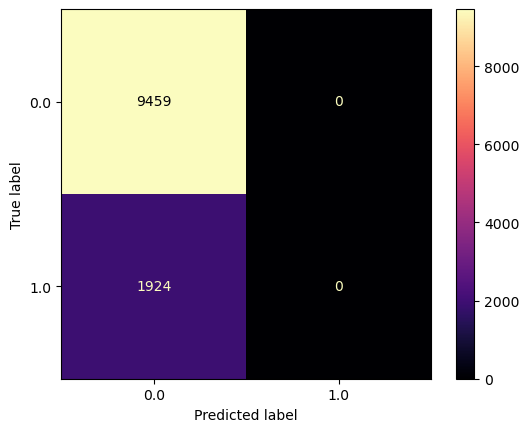

In [6]:
delay_modelling_2.create_model_from_dataset("../combined_flight_data")

In [7]:
delay_modelling_2.predict_delay_probability(delay_df.head(1))

array([[0.66314359, 0.33685641]])

In [8]:
delay_modelling_2.predict_delay_severity(delay_df.head(1))

array([15.80621282])

In [15]:
cols = ['Year','Month',
 'DayofMonth','Origin',
 'temp','dewPt',
 'day_ind','rh',
 'wdir_cardinal','gust',
 'wspd','pressure',
 'wx_phrase']
vals = [2022, 5, 26, 'SEA', 55.0, 50.0, 'D', 83.0, 'S', 0.0, 5.0, 29.45, 'Light Rain']
test = pd.DataFrame(columns=cols)
test.loc[0,:] = vals
test

,Year,Month,DayofMonth,Origin,temp,dewPt,day_ind,rh,wdir_cardinal,gust,wspd,pressure,wx_phrase
0,2022,5,26,SEA,55.0,50.0,D,83.0,S,0.0,5.0,29.45,Light Rain


In [16]:
cols = ['Year','Month',
 'DayofMonth','Origin',
 'temp','dewPt',
 'day_ind','rh',
 'wdir_cardinal','gust',
 'wspd','pressure',
 'wx_phrase']
vals = [2024, 3, 12, 'BIL', 10.0, -4.0, 'D', 37.0, 'WNW', 34.0, 23.0, 1005.4, 'M Cloudy']
test = pd.DataFrame(columns=cols)
test.loc[0,:] = vals
test

,Year,Month,DayofMonth,Origin,temp,dewPt,day_ind,rh,wdir_cardinal,gust,wspd,pressure,wx_phrase
0,2024,3,12,BIL,10.0,-4.0,D,37.0,WNW,34.0,23.0,1005.4,M Cloudy


In [7]:
cols = ['Year','Month',
 'DayofMonth','Origin',
 'temp','dewPt',
 'day_ind','rh',
 'wdir_cardinal','gust',
 'wspd','pressure',
 'wx_phrase']
vals = [2024, 1, 1, 'BIL', 1.0, -4.0, 'D', 1.0, 'WNW', 0.0, 0.0, 1000.0, 'M Cloudy']
test = pd.DataFrame(columns=cols)
test.loc[0,:] = vals
test

,Year,Month,DayofMonth,Origin,temp,dewPt,day_ind,rh,wdir_cardinal,gust,wspd,pressure,wx_phrase
0,2024,1,1,BIL,1.0,-4.0,D,1.0,WNW,0.0,0.0,1000.0,M Cloudy


In [9]:
delay_predictor.predict_delay_probability(test)

FileNotFoundError: [Errno 2] No such file or directory: 'resources/generated/pickles/classifier.pkl'

In [18]:
delay_modelling_2.predict_delay_severity(test)

C:\Users\bruno\miniconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [0, 1, 2, 6, 8, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([11.7341811])

In [ ]:
delay_modelling_2

In [2]:
cols = ['Year','Month',
 'DayofMonth']
vals = [2022, 5, 26]
test = pd.DataFrame(columns=cols)
test.loc[0,:] = vals
test

,Year,Month,DayofMonth
0,2022,5,26


In [4]:
delay_predictor.pre_process_dataset(test,
                                    relevant_columns=test.columns,
                                    target_col="ArrDel15",
                                    encoder_path = "../resources/testing_resources/encoder.pkl")

ValueError: The target column for prediction, ArrDel15, must be present in the given dataframe.

In [5]:
delay_predictor.train_classifier(["Not a valid sparse matrix",
                              pd.DataFrame(),
                              scipy.sparse.csr_matrix((2, 2)),
                              pd.DataFrame()])

ValueError: Found input variables with inconsistent numbers of samples: [25, 0]

In [6]:
datasets = ["Not a valid sparse matrix",
                              pd.DataFrame(),
                              scipy.sparse.csr_matrix((2, 2)),
                              pd.DataFrame()]

In [13]:
(isinstance(datasets[0], scipy.sparse.csr_matrix))

False

In [15]:
if len(datasets) != 4:
    raise ValueError("The input dataset must be a collection of 4 elements.")
if (not isinstance(datasets[0], scipy.sparse.csr_matrix)) or \
   (not isinstance(datasets[2], scipy.sparse.csr_matrix)):
    raise TypeError("The elements at indices 0 and 2 of the datasets parameter must be" + \
                    f"scipy csr matrices. They are currently {type(datasets[0])} and " + \
                    f"{type(datasets[2])}, respectively.")
if (not isinstance(datasets[1], pd.DataFrame)) or \
   (not isinstance(datasets[3], pd.DataFrame)):
    raise TypeError("The elements at indices 1 and 3 of the datasets parameter must be" + \
                    f"Pandas DataFrames. They are currently {type(datasets[1])} and " + \
                    f"{type(datasets[3])}, respectively.")

TypeError: The elements at indices 0 and 2 of the datasets parameter must bescipy csr matrices. They are currently <class 'str'> and <class 'scipy.sparse._csr.csr_matrix'>, respectively.

In [9]:
raise TypeError("The elements at indices 1 and 3 of the datasets parameter must be" + \
         f"Pandas DataFrames. They are currently {type(datasets[1])} and " + \
         f"{type(datasets[3])}, respectively.")

TypeError: The elements at indices 1 and 3 of the datasets parameter must bePandas DataFrames. They are currently <class 'pandas.core.frame.DataFrame'> and <class 'pandas.core.frame.DataFrame'>, respectively.

C:\Users\bruno\miniconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\bruno\miniconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


0.625

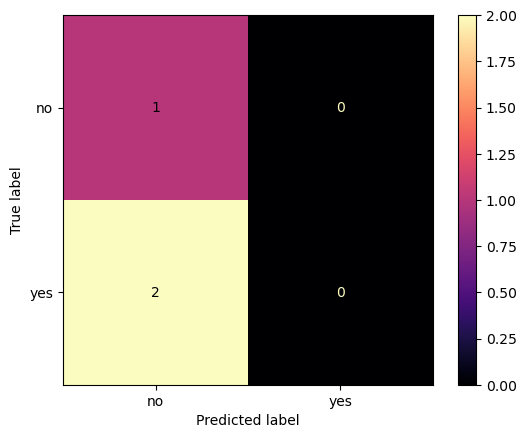

In [14]:
test_df = pd.DataFrame(columns=['Year','Month','DayofMonth', 'SecondHalf'])
test_df.loc[0,:] = [2022, 1, 5, 'no']
test_df.loc[1,:] = [2022, 2, 8, 'no']
test_df.loc[2,:] = [2022, 3, 19, 'yes']
test_df.loc[3,:] = [2022, 4, 14, 'no']
test_df.loc[4,:] = [2022, 5, 1, 'no']
test_df.loc[5,:] = [2022, 6, 16, 'yes']
test_df.loc[6,:] = [2022, 7, 18, 'yes']
test_df.loc[7,:] = [2022, 8, 26, 'yes']
test_df.loc[8,:] = [2022, 9, 4, 'no']
test_df.loc[9,:] = [2022, 10, 9, 'no']
test_df.loc[10,:] = [2022, 11, 22, 'yes']
output = delay_predictor.pre_process_dataset(df_to_process = test_df,
                             target_col='SecondHalf',
                             relevant_columns=['Year','Month','DayofMonth'],
                             encoder_path = "../resources/testing_resources/encoder.pkl")
result = delay_predictor.train_classifier(output)
test_query = pd.DataFrame(columns=['Year','Month','DayofMonth'])
test_query.loc[0,:] = [2022, 4, 2]
result[1]

In [12]:
years = [2022]*50
months = np.array([random.randrange(1,13) for i in range(50)])
days = np.array([random.randrange(1,31) for i in range(50)])
second_half = days >= 15

In [14]:
test_df = pd.DataFrame(columns=['year','month','day','second_half'])
test_df.loc[:,'year'] = years
test_df.loc[:,'month'] = months
test_df.loc[:,'day'] = days
test_df.loc[:,'second_half'] = second_half
test_df.to_csv("../resources/testing_resources/test_date_df.csv")

In [15]:
test_df = pd.read_csv("../resources/testing_resources/test_date_df.csv")
result = delay_predictor.pre_process_dataset(df_to_process = test_df,
                                     target_col='second_half',
                                     relevant_columns=['year','month','day'],
                                     encoder_path = "../resources/testing_resources/encoder.pkl")


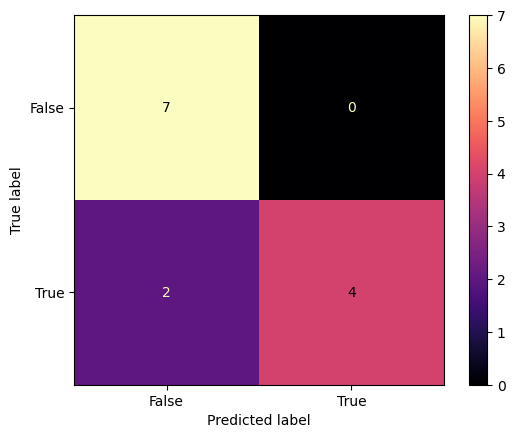

In [27]:
output = []
output.append(scipy.sparse.csr_matrix(result[0]))
output.append(result[1])
output.append(scipy.sparse.csr_matrix(result[2]))
output.append(result[3])
result = delay_predictor.train_classifier(output)

In [18]:
result[0].shape[1] + result[2].shape[1]

6

In [28]:
result[1]

0.972972972972973

In [ ]:
def predict_delay_probability(predictors,
                              classifier_path = PICKLE_FOLDER_PATH + '/classifier.pkl',
                              encoder_path = PICKLE_FOLDER_PATH + '/classification_encoder.pkl'):
    '''
    Predicts the probability of a given flight being delayed.

    This function uses the model containined in "classifier.pkl" to predict delay probability.

    Parameters
    ----------
    pred_vector: A vector of flight properties. Must contain the columns used to train the model.

    Returns
    -------
    A float containing the log-probability of a flight delay.
    '''
    with open(classifier_path, 'rb') as file:
        delay_predictor = pickle.load(file)
    with open(encoder_path, 'rb') as file:
        encoder = pickle.load(file)
    encoded_pred = encoder.transform(predictors)
    return delay_predictor.predict_proba(encoded_pred)

In [36]:
predictors = pd.DataFrame()
PICKLE_FOLDER_PATH = "../resources/generated/pickles"
classifier_path = PICKLE_FOLDER_PATH + '/classifier.pkl'
encoder_path = PICKLE_FOLDER_PATH + '/classification_encoder.pkl'
with open(classifier_path, 'rb') as file:
    delay_predictor = pickle.load(file)
with open(encoder_path, 'rb') as file:
    encoder = pickle.load(file)
#encoded_pred = encoder.transform(predictors)

In [44]:
encoder.feature_names_in_.shape[0]

13

In [41]:
encoder.get_feature_names_out().shape[0]

893

In [38]:
delay_predictor.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'liblinear',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(solver='liblinear'),
 'n_jobs': -2,
 'param_grid': {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [46]:
test_df.columns.shape[0]

5

In [49]:
airport_df = data_processing.combine_zipped_data("../resources/flight_data")

Airport data successfully combined!           


In [ ]:
weather_df = data_processing.combine_weather_data("../resources/generated/weather_data")

In [3]:
TEST_RESOURCES_PATH = "../resources/testing_resources"
test_airport_df = data_processing.combine_zipped_data(TEST_RESOURCES_PATH + "/test_airport_data")
test_weather_df = data_processing.combine_weather_data(TEST_RESOURCES_PATH + "/test_weather_data")
data_processing.match_flight_and_weather_data(test_airport_df, test_weather_df)

Airport data successfully combined!           
Weather data successfully combined!           
2022-01-01 08:53:00 to 2022-01-01 18:53:00 While the weather dataset covers 2022-05-03 10:18:00 to 2022-05-04 10:02:00.


ValueError: The flight dataset and weather dataset must have overlapping time periods for each airport of interest.For the current airport, the flight dataset covers2022-01-01 08:53:00 to 2022-01-01 18:53:00 While the weather dataset covers 2022-05-03 10:18:00 to 2022-05-04 10:02:00.

In [59]:
airport_df.Origin.unique()

array(['DCA', 'CLT', 'TYS', 'PHL', 'PIT', 'PNS', 'CVG', 'ATL', 'FNT',
       'CMH', 'PWM', 'MHT', 'PVD', 'BNA', 'GSO', 'ECP', 'SDF', 'BUF',
       'IND', 'RIC', 'AGS', 'CHS', 'MLB', 'AVL', 'GSP', 'CAK', 'MCI',
       'SAV', 'ABE', 'MKE', 'BDL', 'JAX', 'DSM', 'ORF', 'CHA', 'TUL',
       'SRQ', 'MSY', 'TLH', 'GPT', 'CLE', 'SYR', 'DAY', 'VPS', 'FAY',
       'BHM', 'EWN', 'SHV', 'LEX', 'HSV', 'IAD', 'ROC', 'CAE', 'BTR',
       'BTV', 'MEM', 'STL', 'GRR', 'GNV', 'DAB', 'LAN', 'MYR', 'ILM',
       'CRW', 'ITH', 'SGF', 'LIT', 'HPN', 'LAX', 'TUS', 'SEA', 'DEN',
       'SMF', 'OKC', 'SJC', 'IAH', 'SFO', 'ABQ', 'ELP', 'XNA', 'SAT',
       'DFW', 'FWA', 'FAT', 'ACV', 'PHX', 'ORD', 'PDX', 'YUM', 'SBN',
       'ROW', 'LAW', 'RDM', 'LFT', 'COS', 'LRD', 'BWI', 'SAF', 'SJT',
       'JAN', 'LCH', 'MGM', 'BIS', 'GJT', 'OMA', 'MOB', 'SGU', 'FLG',
       'COU', 'CSG', 'HRL', 'DTW', 'MLU', 'BRO', 'TVC', 'DRO', 'ASE',
       'MHK', 'CLL', 'CRP', 'GRK', 'MFE', 'ICT', 'IDA', 'SLC', 'PSP',
       'AMA', 'STS',

In [6]:
#test_airport_df = data_processing.combine_zipped_data(TEST_RESOURCES_PATH + "/empty_test_folder")
test_weather_df = data_processing.combine_weather_data(TEST_RESOURCES_PATH + "/empty_test_folder")

ValueError: File path must contain a valid file. No files csvs found.